# controversit: a tool to identify potentially controversial submissions on reddit

This version is for exploration and comes in Jupyter notebook format for ease of use.

The tool will be also implemented in script version and as a web app.

In [89]:
import time
import datetime 
import praw
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings; warnings.simplefilter('ignore')

# Setup reddit API

In [2]:
uname = "DavidWithAnE"
upassword = "BROCCO.billy85"
uagent = "controversit by /u/"+uname
cl_id = "l_eEWQRL2Qrvxw"
cl_secret = "QBAlJLF4KPd4ox5ykGTsAoM9Z_A"

reddit = praw.Reddit(client_id=cl_id,
                     client_secret=cl_secret,
                     password=upassword,
                     user_agent=uagent,
                     username=uname)

print("Logged in as user: ",reddit.user.me())

Logged in as user:  DavidWithAnE


# Choose a subreddit and get a list of submissions

In [40]:
def create_pd_dframe(nrows,list_of_fields):
    '''
    A simple function to create an empty
    dataframe with a given number of rows 
    and a given list of columns
    '''
    
    shape = (nrows,len(list_of_fields))
    d = np.empty(shape)
    df = pd.DataFrame(data=d,columns=list_of_fields)
    
    return df

def submission_data_to_dframe(sorting_scheme,n_subm=100):
    '''
    A function that gets n_subm reddit submissions, 
    retrieves their properties, comments to the 
    submission, then saves the results into a pandas 
    dataframe.
    '''

    # Initialize pandas dataframe
    list_of_fields = ["subm_ID","subm_title","subm_author", \
                      "subm_created_utc","subm_upvote_ratio", \
                      "subm_link_flair_text", \
                      "subm_comment_ids", \
                      "subm_comment_authors", \
                      "subm_comment_bodies", \
                      "subm_comment_scores"]
    df = create_pd_dframe(n_subm,list_of_fields)
    df["subm_comment_ids"] = [[]] * len(df)
    df["subm_comment_authors"] = [[]] * len(df)
    df["subm_comment_bodies"] = [[]] * len(df)
    df["subm_comment_scores"] = [[]] * len(df)
        
    # Use reddit api to retrieve the necessary information.
    i = 0 
    for sub in sorting_scheme(limit=n_subm):

        # Data on submissions
        df["subm_ID"].iloc[i] = sub.id
        df["subm_title"].iloc[i] = sub.title
        df["subm_author"].iloc[i] = sub.author
        df["subm_created_utc"].iloc[i] = float(sub.created_utc)
        df["subm_upvote_ratio"].iloc[i] = float(sub.upvote_ratio)
        df["subm_link_flair_text"].iloc[i] = sub.link_flair_text
        
        # Data on comments
        sub.comments.replace_more(limit=0)
        comment_ids = []
        comment_authors = []
        comment_bodies = []
        comment_scores = []
        for com in sub.comments:
            comment_ids.append(com.id)
            comment_authors.append(com.author)
            comment_bodies.append(com.body)
            comment_scores.append(float(com.score))
        df["subm_comment_ids"].iloc[i] = comment_ids
        df["subm_comment_authors"].iloc[i] = comment_authors
        df["subm_comment_bodies"].iloc[i] = comment_bodies
        df["subm_comment_scores"].iloc[i] = comment_scores
        
        # Increase counter
        i=i+1
    
    return df

In [155]:
# Choose a subreddit and a number of submissions

#subreddit_name = "politicaldiscussion"
#subreddit_name = "amitheasshole"
subreddit_name = "changemyview"

n_subm = 100

subreddit_obj = reddit.subreddit(subreddit_name)

subm_data = submission_data_to_dframe(subreddit_obj.new,n_subm=n_subm)

In [157]:
# Display dataframe
subm_data.head(10)

,subm_ID,subm_title,subm_author,subm_created_utc,subm_upvote_ratio,subm_link_flair_text,subm_comment_ids,subm_comment_authors,subm_comment_bodies,subm_comment_scores
0,d3hhtn,CMV: You shouldn't be able to hate on what you...,DeadByLag,1.568336e+09,0.40,NaN,"[f02rkl4, f02sb7r, f02s1h7, f02ulhb, f02uwum, ...","[miguelguajiro, Mnlybdg, TheVioletBarry, absol...","[I agree about Lil’ Peep and such, but with IC...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
1,d3h2aj,CMV: Ty Oliver McDowell should not have been s...,IsRapeAlwaysWrong,1.568334e+09,1.00,NaN,"[f02pgza, f02pkc2]","[GetToMars, Armadeo]","[What he did sounds strongly like negligence, ...","[1.0, 1.0]"
2,d3fh56,CMV: Black people should not refer to themselv...,naganarb,1.568327e+09,0.50,Deltas(s) from OP,"[f02isst, f02emnq, f02f2jn, f02eoc0, f02ehxv, ...","[DeltaBot, amishlatinjew, planthoney, Skull025...",[/u/naganarb (OP) has awarded 1 delta(s) in th...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,d3f4mu,CMV: Closet racism is ok and natural for humans.,yung_thomas,1.568325e+09,0.41,None,"[f029rf6, f028fj0, f02ae91, f02bfo3, f02cjbx, ...","[c4t4ly5t, Thintegrator, Abstracting_You, View...",[>I am only saying that racists should be able...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,d3f1dk,CMV: There should be an exam determining the v...,VR_AR,1.568325e+09,0.42,Delta(s) from OP,"[f02bry9, f027uzy, f028cpy, f02a1d4, f02832y, ...","[DeltaBot, pluralofjackinthebox, Feathring, Mc...",[/u/VR_AR (OP) has awarded 2 delta(s) in this ...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
5,d3e4qj,CMV: Amorality is necessary to lead a comforta...,CrashRiot,1.568321e+09,0.42,None,"[f020hcq, f020qws, f029wjy, f020xhw, f022o48, ...","[NaturaSiveDeus, CorporalWotjek, CunningAllusi...","[It really depends on how one defines ""comfort...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
6,d3dzrd,CMV: Gatekeeping as a principle is not inheren...,knowstuffsolveprobs,1.568321e+09,0.36,None,"[f01zcmq, f02129r, f027qt8, f02dgfi, f02f451, ...","[UNRThrowAway, svenson_26, None, Quint-V, ReOs...",[The issue with gatekeeping is that the standa...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
7,d3db44,CMV: Apple with Tim Cook is a terribly run com...,KyleCAV,1.568318e+09,0.83,Deltas(s) from OP,"[f02ri7s, f01wag6, f01rczk, f01ydhb, f023uon, ...","[DeltaBot, McKoijion, Ansuz07, PE_Norris, warl...",[/u/KyleCAV (OP) has awarded 1 delta(s) in thi...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
8,d3caiu,CMV: The FAA should end the ban on hydrogen as...,SeekingToFindBalance,1.568314e+09,0.72,None,"[f01hoxx, f01gwmh, f01idfs, f023yqt, f01furm, ...","[shortadamlewis, abunchofsoandso, iamasecretth...",[Nope... the destruction of hydrogen blimps wa...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
9,d3bu0i,CMV: I feel that Warren supporters are people ...,Lord_Blathoxi,1.568312e+09,0.55,None,"[f01t17p, f019q0w, f019m64, f01bkqp, f01gbjn, ...","[DeltaBot, onetwo3four5, Resident_Egg, miguelg...",[/u/Lord_Blathoxi (OP) has awarded 2 delta(s) ...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [158]:
# Save the data
timestamp = time.time()
dati = datetime.datetime.fromtimestamp(timestamp)
da = str(dati)[0:10]
ti = str(dati)[11:19]

fname = "dump_r-"+subreddit_name+"_"+da+".pkl"
print(fname)
subm_data.to_pickle(fname)

dump_r-changemyview_2019-09-12.pkl


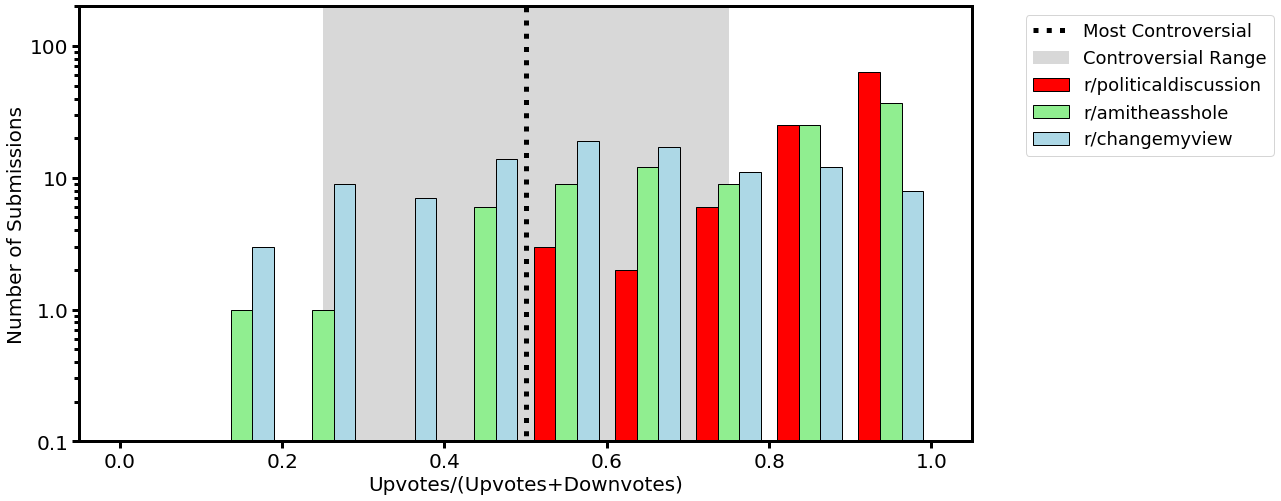

In [227]:
# Make an histogram of the controversial indicator 
# i.e. subm_upvote_ratio

# Load a couple of 
df0 = pd.read_pickle("dump_r-politicaldiscussion_2019-09-12.pkl")
name0 = "politicaldiscussion"
df1 = pd.read_pickle("dump_r-amitheasshole_2019-09-12.pkl")
name1 = "amitheasshole"
df2 = pd.read_pickle("dump_r-changemyview_2019-09-12.pkl")
name2 = "changemyview"

params={'font.size': 20,'axes.labelsize': 20,'legend.fontsize': 18,
        'xtick.labelsize': 20,'ytick.labelsize': 20,'lines.linewidth': 4,'axes.linewidth': 3,
        'xtick.major.width': 3,'ytick.major.width': 3,'xtick.minor.width': 3,'ytick.minor.width': 3,
        'xtick.major.size': 7,'ytick.major.size': 7,'xtick.minor.size': 5,'ytick.minor.size': 5,
        'lines.markeredgewidth' : 3, 'lines.markersize': 6}
mpl.rcParams.update(params)

fig = plt.figure(figsize=(16,8))
plt.xscale("linear")
plt.yscale("log")
plt.axis([-0.05,1.05,0.1,200])
plt.xlabel("Upvotes/(Upvotes+Downvotes)")
plt.xticks(np.arange(0,1.2,0.2),labels=["0.0","0.2","0.4","0.6","0.8","1.0"])
plt.ylabel("Number of Submissions")
plt.yticks([0.1,1,10,100],labels=["0.1","1.0","10","100"])
plt.axvspan(0.25, 0.75, facecolor='gray',alpha=0.3,label="Controversial Range")
plt.plot([0.5,0.5],[0,1e8],"k:",linewidth=5,label="Most Controversial")
histdata = [df0["subm_upvote_ratio"].values,df1["subm_upvote_ratio"].values,df2["subm_upvote_ratio"].values]

colors = ["red","lightgreen","lightblue"]
labels = ["r/"+name0,"r/"+name1,"r/"+name2]
plt.hist(histdata,bins=10,range=[0,1],rwidth=0.8,label=labels,color=colors,edgecolor='black',alpha=1)
plt.legend(loc='top left', bbox_to_anchor=(1.05, 1.0))


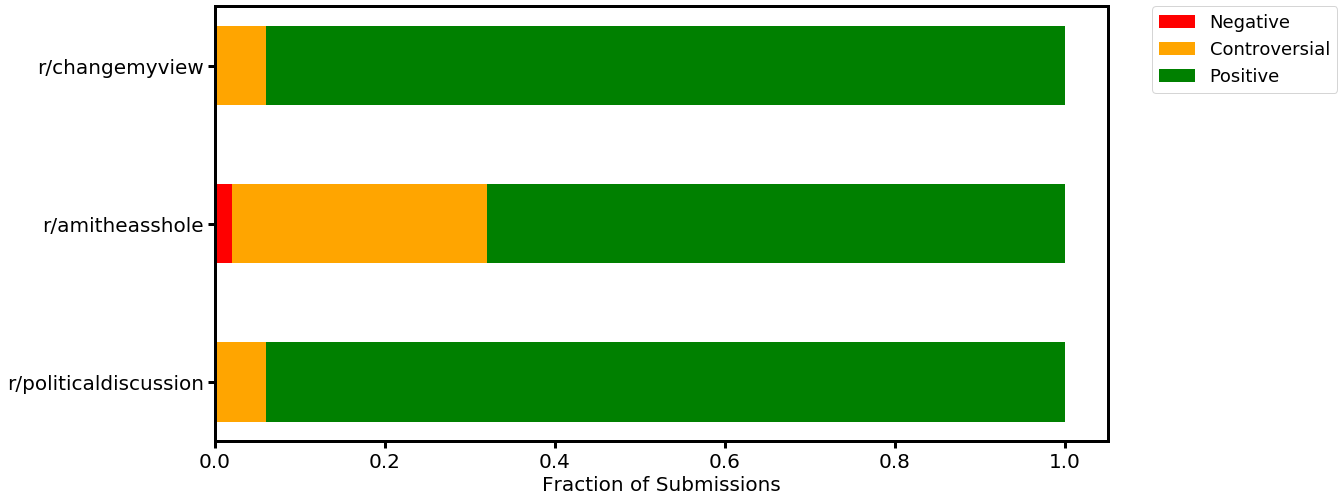

In [228]:
# Another interesting plot

# Load a couple of 
df0 = pd.read_pickle("dump_r-politicaldiscussion_2019-09-12.pkl")
name0 = "politicaldiscussion"
df1 = pd.read_pickle("dump_r-amitheasshole_2019-09-12.pkl")
name1 = "amitheasshole"
df2 = pd.read_pickle("dump_r-changemyview_2019-09-12.pkl")
name2 = "changemyview"

params={'font.size': 20,'axes.labelsize': 20,'legend.fontsize': 18,
        'xtick.labelsize': 20,'ytick.labelsize': 20,'lines.linewidth': 4,'axes.linewidth': 3,
        'xtick.major.width': 3,'ytick.major.width': 3,'xtick.minor.width': 3,'ytick.minor.width': 3,
        'xtick.major.size': 7,'ytick.major.size': 7,'xtick.minor.size': 5,'ytick.minor.size': 5,
        'lines.markeredgewidth' : 3, 'lines.markersize': 6}
mpl.rcParams.update(params)

sel0 = df0["subm_upvote_ratio"] <= 0.25
sel1 = df1["subm_upvote_ratio"] <= 0.25
sel2 = df2["subm_upvote_ratio"] <= 0.25
negative_opinion = np.array([ \
                    float(len(df0["subm_upvote_ratio"][sel0]))/float(len(df0["subm_upvote_ratio"])), \
                    float(len(df1["subm_upvote_ratio"][sel1]))/float(len(df1["subm_upvote_ratio"])), \
                    float(len(df2["subm_upvote_ratio"][sel0]))/float(len(df2["subm_upvote_ratio"])) \
                   ])

sel0 = df0["subm_upvote_ratio"] >= 0.75
sel1 = df1["subm_upvote_ratio"] >= 0.75
sel2 = df2["subm_upvote_ratio"] >= 0.75
positive_opinion = np.array([ \
                    float(len(df0["subm_upvote_ratio"][sel0]))/float(len(df0["subm_upvote_ratio"])), \
                    float(len(df1["subm_upvote_ratio"][sel1]))/float(len(df1["subm_upvote_ratio"])), \
                    float(len(df2["subm_upvote_ratio"][sel0]))/float(len(df2["subm_upvote_ratio"])) \
                   ])

controversial_opinion = np.array([1.0,1.0,1.0])
controversial_opinion = controversial_opinion-positive_opinion-negative_opinion

plt.figure(figsize=(16,8))
ind = [0,1,2]
p1 = plt.barh(ind,negative_opinion,height=0.5,color="red",label="Negative")
p2 = plt.barh(ind,controversial_opinion,height=0.5,color="orange",left=negative_opinion,label="Controversial")
p3 = plt.barh(ind,positive_opinion,color="green",height=0.5,\
     left=negative_opinion+controversial_opinion, label="Positive")
plt.xlabel("Fraction of Submissions")
plt.yticks(ind,["r/"+name0,"r/"+name1,"r/"+name2])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)